In [1]:

#Import Library
import numpy as np 
import pandas as pd

from pandas import DataFrame
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/80-cereals/cereal.csv


In [2]:
#Import file
df_cereals=pd.read_csv('../input/80-cereals/cereal.csv')

In [3]:
#info file
df_cereals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
#display if there are some null value
print(df_cereals.isnull().sum())

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [5]:
#drop shelf column
df_cereals.drop('shelf', axis=1, inplace=True)
df_cereals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  weight    77 non-null     float64
 13  cups      77 non-null     float64
 14  rating    77 non-null     float64
dtypes: float64(5), int64(7), object(3)
memory usage: 9.1+ KB


In [6]:
# Replace with complete name the Manufacture Name
df_cereals = df_cereals.replace("N","Nabisco").replace("Q","Quaker Oats").replace("A","American Home Food Products").replace("K","Kelloggs").replace("P","Post").replace("R","Ralston Purina").replace("G","General Mils")
df_cereals

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,General Mils,C,110,2,1,250,0.0,21.0,3,60,25,1.0,0.75,39.106174
73,Trix,General Mils,C,110,1,1,140,0.0,13.0,12,25,25,1.0,1.00,27.753301
74,Wheat Chex,Ralston Purina,C,100,3,1,230,3.0,17.0,3,115,25,1.0,0.67,49.787445
75,Wheaties,General Mils,C,100,3,1,200,3.0,17.0,3,110,25,1.0,1.00,51.592193


In [7]:
#display how many cereals produce every Manufacture
Manufacture = df_cereals.groupby('mfr').count()['name']
print('Manufacture')

Manufacture


In [8]:
# find the average of rating based on customers experience for every Manufactures:
AvgRating = df_cereals[["mfr","rating"]].groupby("mfr").mean()


#print the result rounded the number
print("The average Rating of Manufacture based on customers satisfy is :\n" ,np.round(AvgRating))

The average Rating of Manufacture based on customers satisfy is :
                              rating
mfr                                
American Home Food Products    55.0
General Mils                   34.0
Kelloggs                       44.0
Nabisco                        68.0
Post                           42.0
Quaker Oats                    43.0
Ralston Purina                 42.0


                       rating
name                         
Cap'n'Crunch             18.0
Cinnamon Toast Crunch    20.0
Honey Graham Ohs         22.0
Count Chocula            22.0
Cocoa Puffs              23.0
Golden Grahams           24.0


Text(0.5, 1.0, 'Top Product')

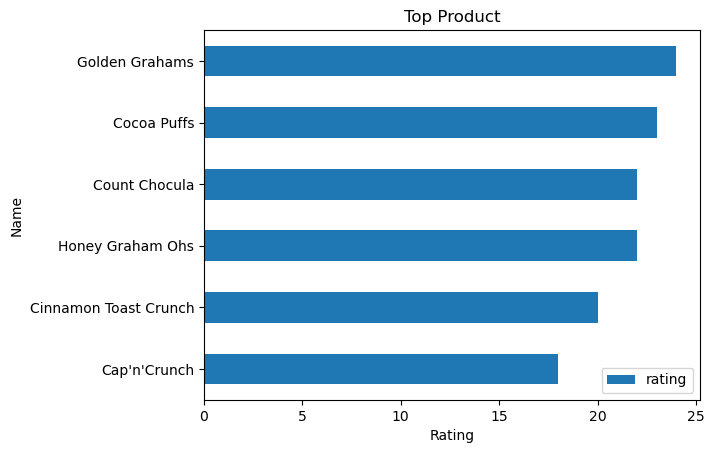

In [9]:
#top 5 product by rating avg
avgProduct = df_cereals[["name","rating"]].groupby("name").mean().round().sort_values('rating', ascending=True)

print(avgProduct[0:6])


#plot
import matplotlib.pyplot as plt

avgProduct[0:6].plot(kind='barh')
plt.ylabel('Name')
plt.xlabel('Rating')
plt.title('Top Product')

#avgProduct[0:6].plot(kind='bar', color='green',width = 0.4, xlabel='Top 5 Product', ylabel='')


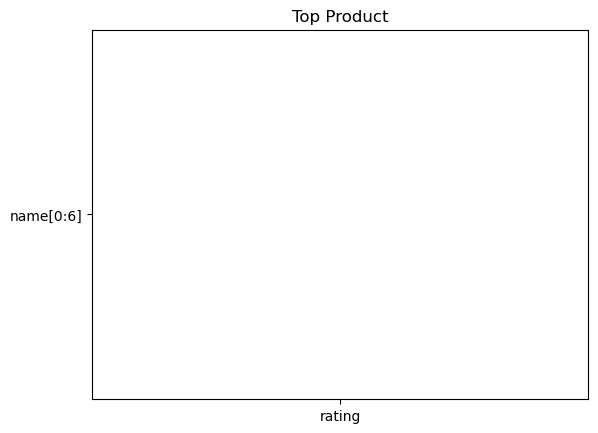

In [10]:

plt.barh('name[0:6]','rating')
plt.ylabel('')
plt.xlabel('')
plt.title('Top Product')
plt.show()

In [11]:
#Display the quality of products
df=pd.DataFrame(df_cereals)
df.loc[df_cereals['rating']>=70, 'quality']='Good Quality'
df.loc[(df_cereals['rating']>=50) & (df_cereals['rating']<70), 'quality'] ='Medium Quality'
df.loc[df_cereals['rating']<50, 'quality']='Bad Quality'
print(df[['rating','quality']])

       rating         quality
0   68.402973  Medium Quality
1   33.983679     Bad Quality
2   59.425505  Medium Quality
3   93.704912    Good Quality
4   34.384843     Bad Quality
..        ...             ...
72  39.106174     Bad Quality
73  27.753301     Bad Quality
74  49.787445     Bad Quality
75  51.592193  Medium Quality
76  36.187559     Bad Quality

[77 rows x 2 columns]
